In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import plotly as py

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
players = pd.read_csv("WorldCupPlayers.csv")
matches = pd.read_csv("WorldCupMatches.csv")
world_cups = pd.read_csv("WorldCups.csv")

In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [ ]:
players.describe()
players

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
...,...,...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65'
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN


In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [ ]:
matches.describe()
matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
players.head(10)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
5,201,1096,MEX,LUQUE Juan (MEX),S,0,Rafael GARZA,C,NaN
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
7,201,1096,MEX,LUQUE Juan (MEX),S,0,Hilario LOPEZ,NaN,NaN
8,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Etienne MATTLER,NaN,NaN
9,201,1096,MEX,LUQUE Juan (MEX),S,0,Dionisio MEJIA,NaN,NaN


In [ ]:
matches.head(10)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
5,1930.0,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,,9249.0,1.0,0.0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201.0,1095.0,CHI,MEX
6,1930.0,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4.0,0.0,Bolivia,,18306.0,0.0,0.0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201.0,1092.0,YUG,BOL
7,1930.0,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Paraguay,,18306.0,2.0,0.0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201.0,1097.0,USA,PAR
8,1930.0,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1.0,0.0,Peru,,57735.0,0.0,0.0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201.0,1099.0,URU,PER
9,1930.0,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1.0,0.0,France,,2000.0,0.0,0.0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201.0,1094.0,CHI,FRA


In [ ]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
world_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [ ]:
world_cups.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


Data cleaning

In [ ]:
matches.dropna(subset=['Year'], inplace=True)

In [ ]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [ ]:
matches['Home Team Name'].value_counts()

Home Team Name
Brazil                        82
Italy                         57
Argentina                     54
Germany FR                    43
England                       35
                              ..
Wales                          1
Norway                         1
rn">United Arab Emirates       1
Haiti                          1
rn">Bosnia and Herzegovina     1
Name: count, Length: 78, dtype: int64

In [ ]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Home Team Name
rn">Republic of Ireland       5
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
Name: count, dtype: int64

In [ ]:
wrong = list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina']

In [ ]:
correct = [name.split('>')[1] for name in wrong]
correct

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

In [ ]:
correct = [name.split('>')[1] for name in wrong]
correct

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

In [ ]:
correct = [name.split('>')[1] for name in wrong]
correct

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

In [ ]:
wrong, correct

(['rn">Republic of Ireland',
  'rn">United Arab Emirates',
  'rn">Trinidad and Tobago',
  'rn">Serbia and Montenegro',
  'rn">Bosnia and Herzegovina'],
 ['Republic of Ireland',
  'United Arab Emirates',
  'Trinidad and Tobago',
  'Serbia and Montenegro',
  'Bosnia and Herzegovina'])

In [ ]:
for index, wr in enumerate(wrong):
    world_cups = world_cups.replace(wrong[index], correct[index])

for index, wr in enumerate(wrong):
    matches = matches.replace(wrong[index], correct[index])

for index, wr in enumerate(wrong):
    players = players.replace(wrong[index], correct[index])

In [ ]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Series([], Name: count, dtype: int64)

Most Number of World Cup Winning Title

In [ ]:
winner = world_cups['Winner'].value_counts()
winner

Winner
Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
England       1
France        1
Spain         1
Germany       1
Name: count, dtype: int64

In [ ]:
runnerup = world_cups['Runners-Up'].value_counts()
runnerup

Runners-Up
Argentina         3
Germany FR        3
Netherlands       3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
Sweden            1
Germany           1
France            1
Name: count, dtype: int64

In [ ]:
third = world_cups['Third'].value_counts()
third

Third
Germany        3
Brazil         2
Sweden         2
France         2
Poland         2
USA            1
Austria        1
Chile          1
Portugal       1
Germany FR     1
Italy          1
Croatia        1
Turkey         1
Netherlands    1
Name: count, dtype: int64

In [ ]:
teams = pd.concat([winner, runnerup, third], axis=1)
teams.fillna(0, inplace=True)
teams = teams.astype(int)
teams


,count,count,count
Brazil,5,2,2
Italy,4,2,1
Germany FR,3,3,1
Uruguay,2,0,0
Argentina,2,3,0
England,1,0,0
France,1,1,2
Spain,1,0,0
Germany,1,1,3
Netherlands,0,3,1


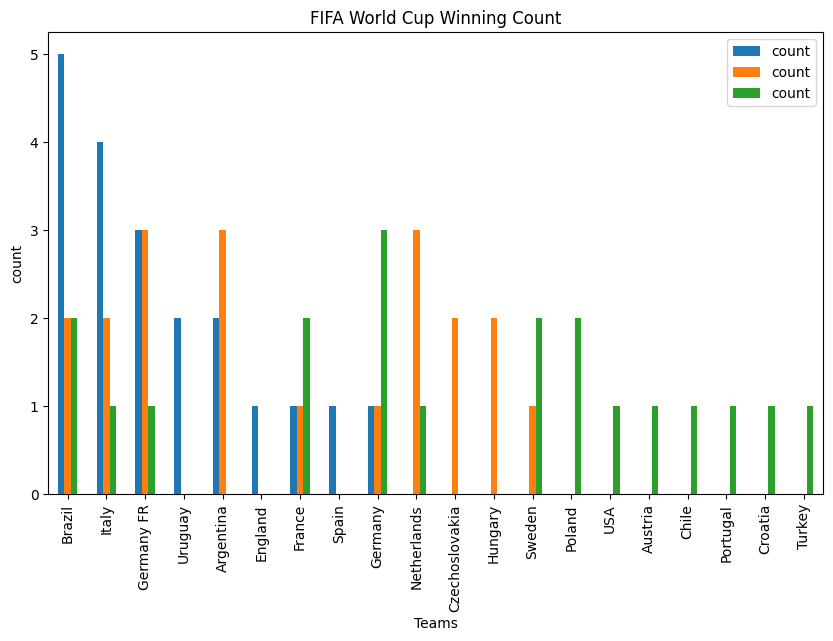

In [ ]:
ax = teams.plot(kind='bar', figsize=(10, 6))

# Add titles and labels
ax.set_title('FIFA World Cup Winning Count')
ax.set_xlabel('Teams')
ax.set_ylabel('count')

# Show the plot
plt.show()

Number of Goals Per Country



In [ ]:
matches.head(4)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER


In [ ]:
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

In [ ]:
home.columns = ['Countries', 'Goals']
away.columns = home.columns

In [ ]:
goals = pd.concat([home, away], ignore_index=True)


In [ ]:
goals = goals.groupby('Countries').sum()
goals


,Goals
Countries,
Algeria,14.0
Angola,1.0
Argentina,133.0
Australia,11.0
Austria,43.0
...,...
United Arab Emirates,2.0
Uruguay,80.0
Wales,4.0


In [ ]:
goals = goals.sort_values(by = 'Goals', ascending=False)
goals

,Goals
Countries,
Brazil,225.0
Argentina,133.0
Germany FR,131.0
Italy,128.0
France,108.0
...,...
Canada,0.0
Trinidad and Tobago,0.0
China PR,0.0


Attendance, Number of Teams, Goals, and Matches per Cup

In [ ]:
world_cups['Attendance'] = world_cups['Attendance'].str.replace(".", "")


In [ ]:
world_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607


Text(0.5, 1.0, 'Matches Plyed Scored by Teams Per Year')

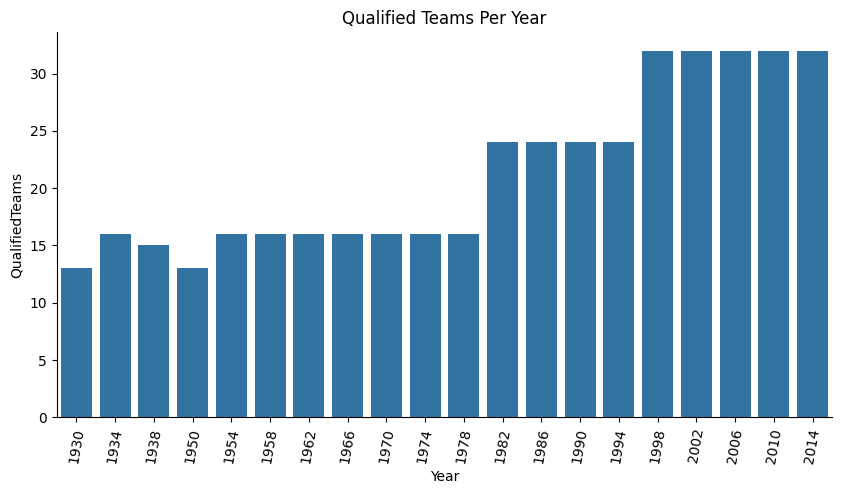

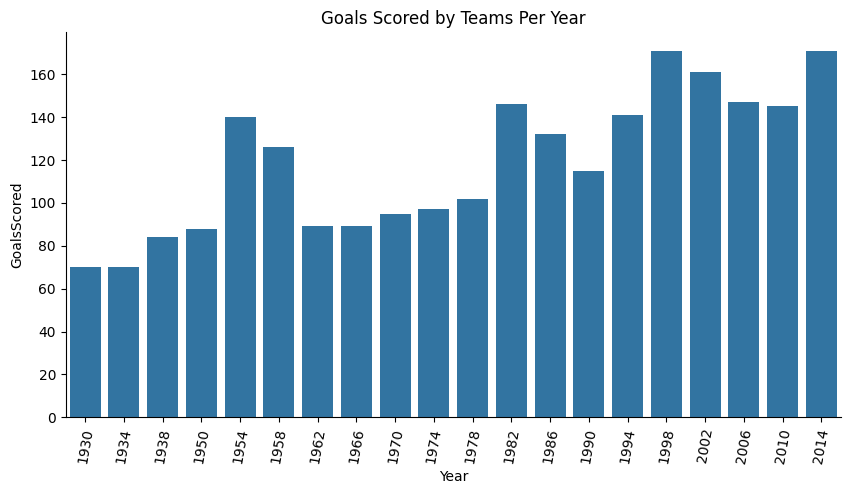

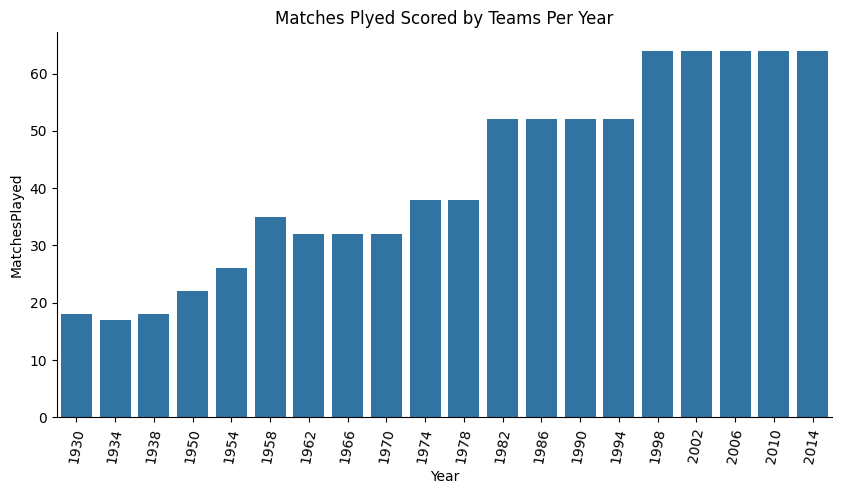

In [ ]:




fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'QualifiedTeams', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Qualified Teams Per Year')


fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'GoalsScored', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Goals Scored by Teams Per Year')




fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'MatchesPlayed', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Matches Plyed Scored by Teams Per Year')

In [ ]:
Stadium_host = matches.Stadium.value_counts().head(10)
Stadium_host

Stadium
Estadio Azteca             19
Jalisco                    14
Olympiastadion             14
Nou Camp - Estadio Le�n    11
Estadio Centenario         10
Estadio do Maracana        10
Estadio Nacional           10
Nacional                   10
Wembley Stadium             9
Stade du Parc Lescure       9
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of matches hosted by a Stadium')

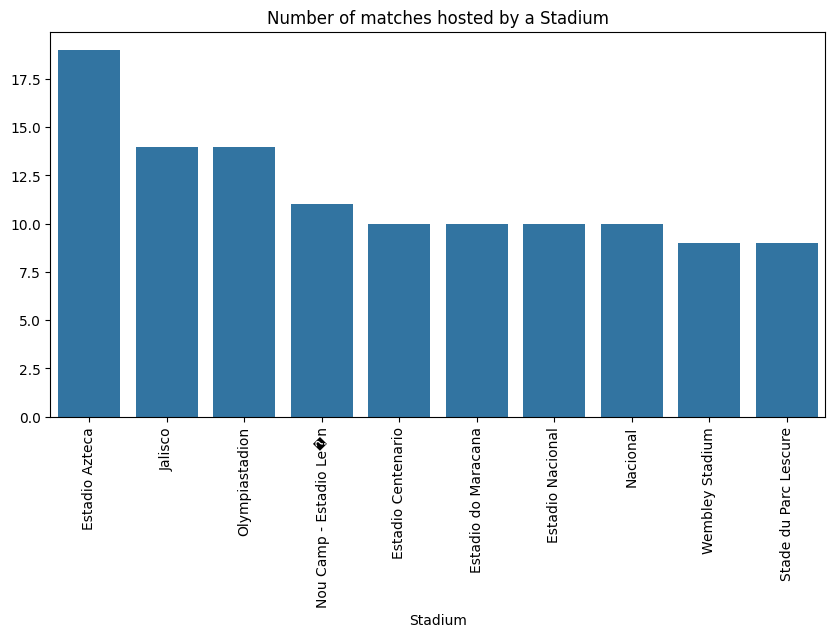

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=Stadium_host.index, y=Stadium_host.values) # Use the index as x and values as y
plt.xticks(rotation=90)
plt.title('Number of matches hosted by a Stadium')

Text(0.5, 1.0, 'Number of podium by country')

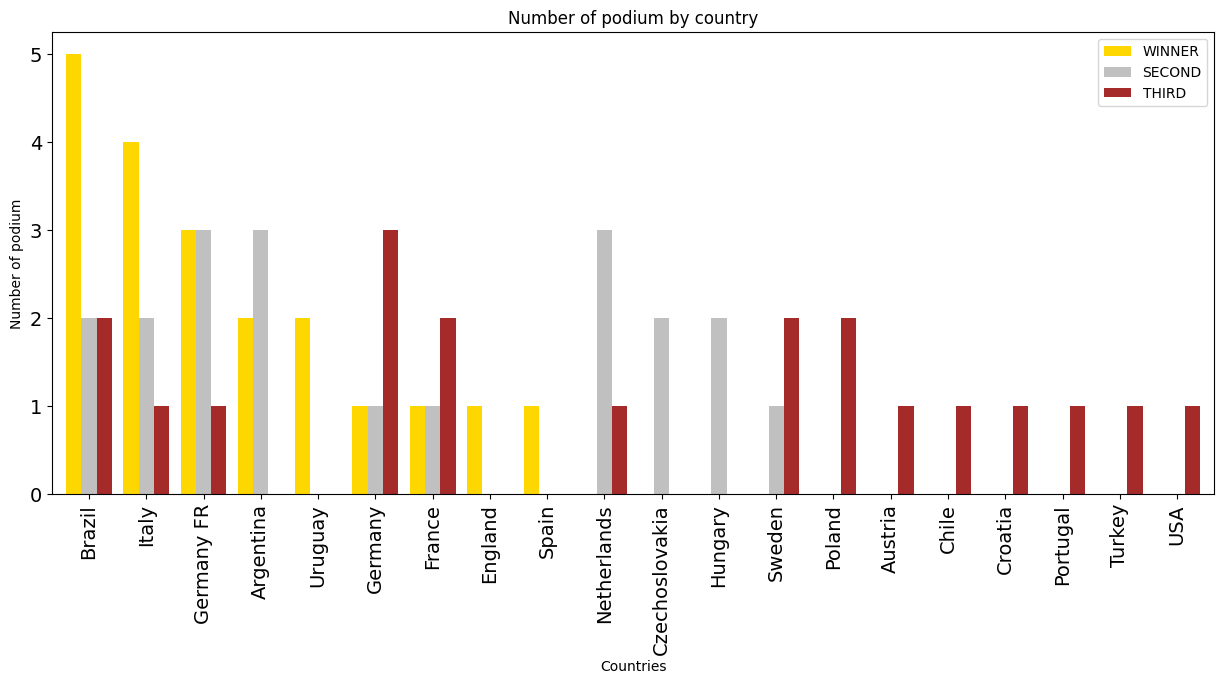

In [ ]:
gold = world_cups["Winner"]
silver = world_cups["Runners-Up"]
bronze = world_cups["Third"]

gold_count = pd.DataFrame.from_dict(gold.value_counts())
silver_count = pd.DataFrame.from_dict(silver.value_counts())
bronze_count = pd.DataFrame.from_dict(bronze.value_counts())
# Join the DataFrames, specifying suffixes for overlapping columns
podium_count = gold_count.join(silver_count, how='outer', lsuffix='_gold', rsuffix='_silver').join(bronze_count, how='outer', rsuffix='_bronze')
podium_count = podium_count.fillna(0)
# Rename the columns
podium_count.columns = ['WINNER', 'SECOND', 'THIRD']
podium_count = podium_count.astype('int64')
podium_count = podium_count.sort_values(by=['WINNER', 'SECOND', 'THIRD'], ascending=False)

podium_count.plot(y=['WINNER', 'SECOND', 'THIRD'], kind="bar",
                  color =['gold','silver','brown'], figsize=(15, 6), fontsize=14,
                 width=0.8, align='center')
plt.xlabel('Countries')
plt.ylabel('Number of podium')
plt.title('Number of podium by country')

Which Referee ruled maximum matches?

In [ ]:
Referee_count = matches.Referee.value_counts().head(20)
Referee_count

Referee
Ravshan IRMATOV (UZB)         10
RODRIGUEZ Marco (MEX)          8
LARRIONDA Jorge (URU)          8
ARCHUNDIA Benito (MEX)         8
QUINIOU Joel (FRA)             8
DE BLEECKERE Frank (BEL)       7
LANGENUS Jean (BEL)            7
WEBB Howard (ENG)              7
SIMON Carlos (BRA)             7
GARDEAZABAL Juan (ESP)         7
BUJSAIM Ali (UAE)              7
GRIFFITHS Benjamin (WAL)       7
ROSETTI Roberto (ITA)          6
Nicola RIZZOLI (ITA)           6
EL GHANDOUR Gamal (EGY)        6
LATYCHEV Nikolaj (URS)         6
RUIZ Oscar (COL)               6
BRIZIO CARTER Arturo (MEX)     6
ELLIS Arthur (ENG)             6
AL SHARIF Jamal (SYR)          6
Name: count, dtype: int64

In [ ]:
highest_matches = world_cups.sort_values('MatchesPlayed',ascending = False).head(10)
highest_matches

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3386810
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3178856
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3359439
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2705197
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2785100
11,1982,Spain,Italy,Germany FR,Poland,France,146,24,52,2109723
14,1994,USA,Brazil,Italy,Sweden,Bulgaria,141,24,52,3587538
13,1990,Italy,Germany FR,Argentina,Italy,England,115,24,52,2516215
12,1986,Mexico,Argentina,Germany FR,France,Belgium,132,24,52,2394031
10,1978,Argentina,Argentina,Netherlands,Brazil,Italy,102,16,38,1545791


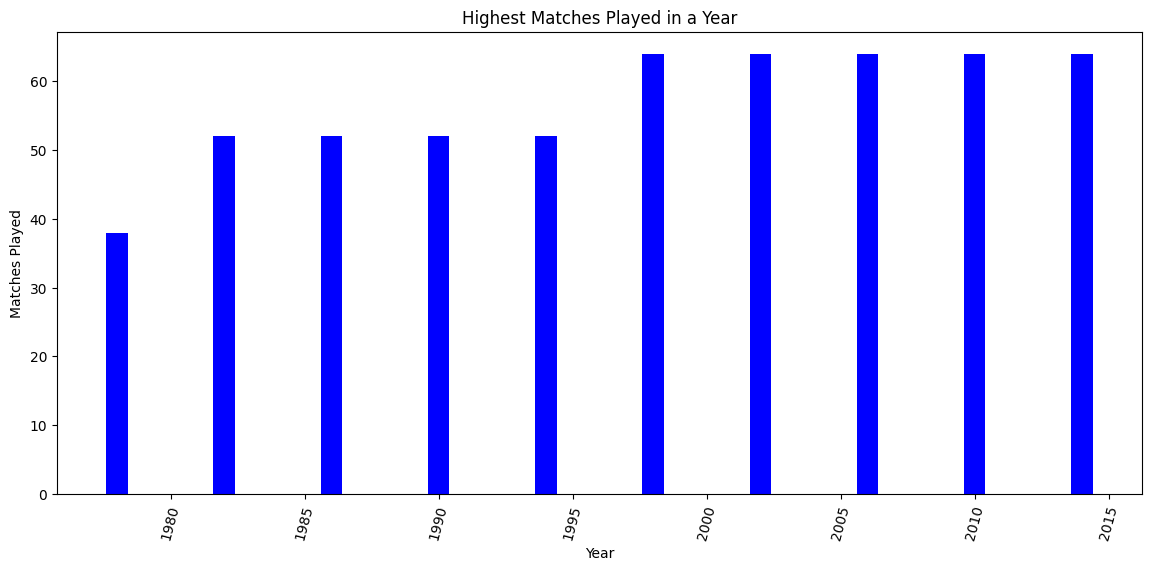

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.xticks(rotation=75)
plt.title("Highest Matches Played in a Year")
plt.xlabel("Year")
plt.ylabel("Matches Played")

# Create a bar plot instead of a line plot
plt.bar(highest_matches['Year'], highest_matches['MatchesPlayed'], color='b')

plt.show()


Match outcome by home and away teams

In [ ]:
def get_labels(matches):
    if matches['Home Team Goals'] > matches['Away Team Goals']:
        return 'Home Team Win'
    if matches['Home Team Goals'] < matches['Away Team Goals']:
        return 'Away Team Win'
    return 'DRAW'

In [ ]:
matches['outcome'] = matches.apply(lambda x: get_labels(x), axis=1)

In [ ]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,outcome
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,Home Team Win
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,Home Team Win
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Home Team Win
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Home Team Win
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Home Team Win


In [ ]:
mat = matches['outcome'].value_counts()
mat

outcome
Home Team Win    488
DRAW             190
Away Team Win    174
Name: count, dtype: int64

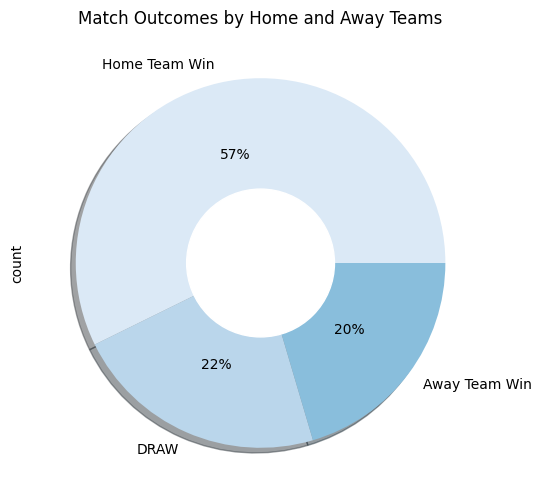

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (6,6))

# Use a valid Seaborn color palette
mt.plot.pie(autopct = "%1.0f%%", colors = sns.color_palette('Blues'), shadow = True)

c = plt.Circle((0,0), 0.4, color =  'white')
plt.gca().add_artist(c)
plt.title('Match Outcomes by Home and Away Teams')
plt.show()